Employee Performance Analysis 

Analysis Inspiration:
What is the overall diversity profile of the organization?
Is there any relationship employee profile and their performance score?
What are our best recruiting sources if we want to ensure a diverse organization and high performing employees?


### Models for analysis:
--K-Nearest Neighbor

--Logistic Regression

--Decision Tree

--Random Forest

In [52]:
# data source: https://www.kaggle.com/rhuebner/human-resources-data-set/data

######################### house keeping ########################
import numpy as np
import pandas as pd
import seaborn as sb
import os
import warnings
warnings.filterwarnings(action="ignore") # Ignore useless warnings (see SciPy issue #5998)
# to plot figures
%matplotlib inline  
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm, datasets

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# directory
PROJECT_ROOT_DIR = "C://Users//panka//Documents//Sweta//Data Science Programming//Project2//"
DATA_DIR = os.path.join(PROJECT_ROOT_DIR,"HR Data") 

In [53]:
HRdat_raw = pd.read_csv(os.path.join(DATA_DIR,"HRDataset_v9.csv"))
HRdat_raw.head()

,Employee Name,Employee Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Pay Rate,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.50,...,10/27/2008,3317,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.00,...,1/6/2014,1420,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.00,...,9/29/2014,1154,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,21.50,...,2/16/2015,58,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1307059817,0,0,0,1,1,9,30,16.56,...,5/1/2015,940,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [54]:
# include only variables of interest
col_HRdat = ['Age','Pay Rate','State','Sex','MaritalDesc','CitizenDesc','Hispanic/Latino',
             'RaceDesc','Days Employed','Reason For Term','Employment Status','Department',
             'Position','Employee Source','Performance Score']
HRdat = HRdat_raw.loc[:,col_HRdat]
HRdat.head()

,Age,Pay Rate,State,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Employee Source,Performance Score
0,30,28.50,MA,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Diversity Job Fair,Fully Meets
1,34,23.00,MA,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Website Banner Ads,Fully Meets
2,31,29.00,MA,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Internet Search,Fully Meets
3,32,21.50,MA,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Website Banner Ads,N/A- too early to review


In [55]:
HRdat.dtypes

Age                    int64
Pay Rate             float64
State                 object
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Employee Source       object
Performance Score     object
dtype: object

In [56]:
col_num = ['Age', 'Pay Rate', 'Days Employed']
col_cat = ['State', 'Sex', 'MaritalDesc', 'CitizenDesc', 'Hispanic/Latino',
           'RaceDesc', 'Reason For Term', 'Employment Status', 'Department',
           'Position', 'Employee Source', 'Performance Score']

#Running a for loop to create histograms analysing the numerical data columns
#Reference: https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python

#Tweaked the code to plot as per our dataset### Data Exploration

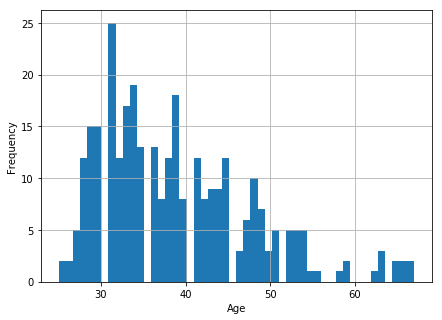

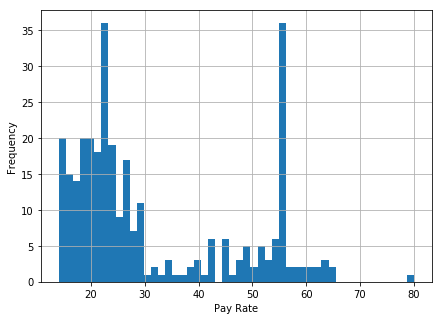

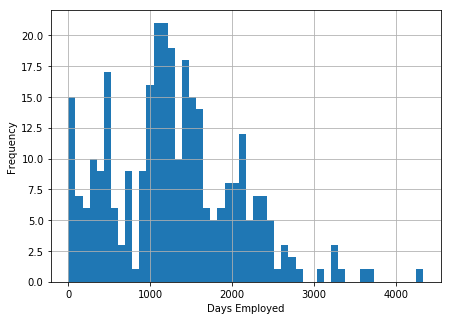

In [57]:

for col_name in col_num:
    HRdat[col_name].hist(bins=50, figsize=(7,5))
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()

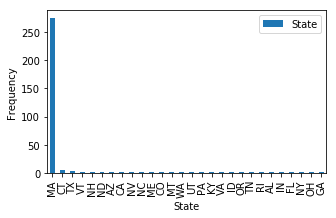

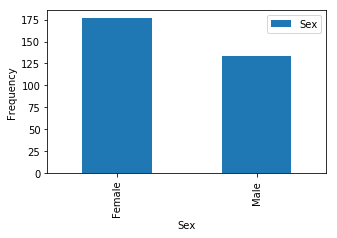

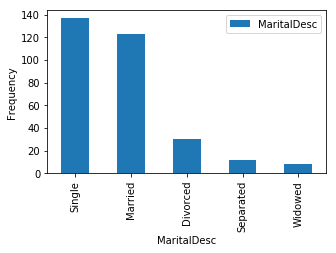

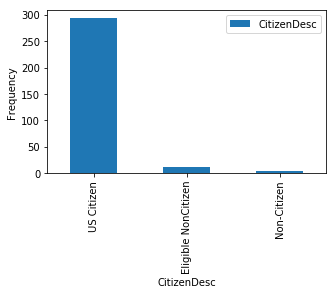

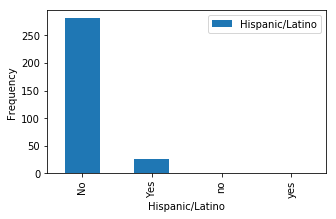

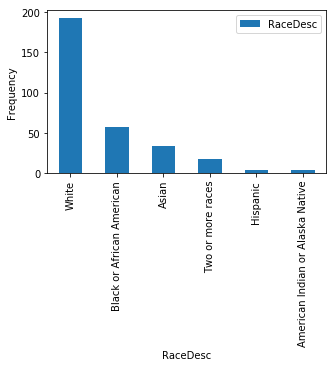

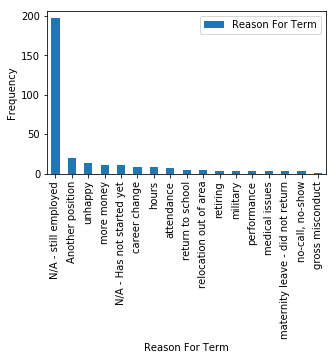

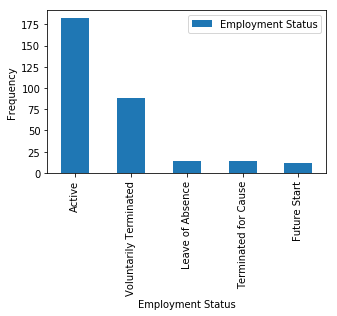

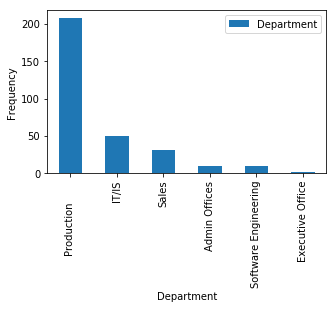

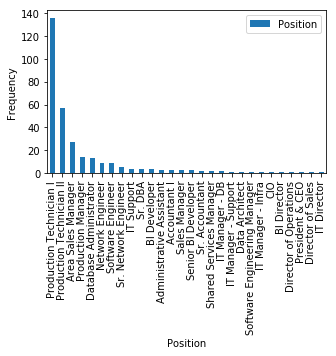

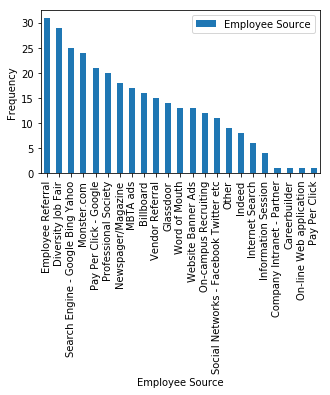

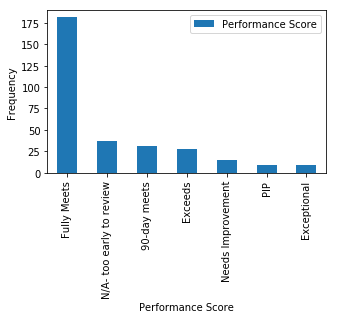

In [58]:
#Running a for loop to create histograms analysing the categorical data columns

for col_name in col_cat:
    HRdat_cat_count = pd.DataFrame(HRdat[col_name].value_counts())
    HRdat_cat_count.plot(kind = 'bar',figsize = (5,3))
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()


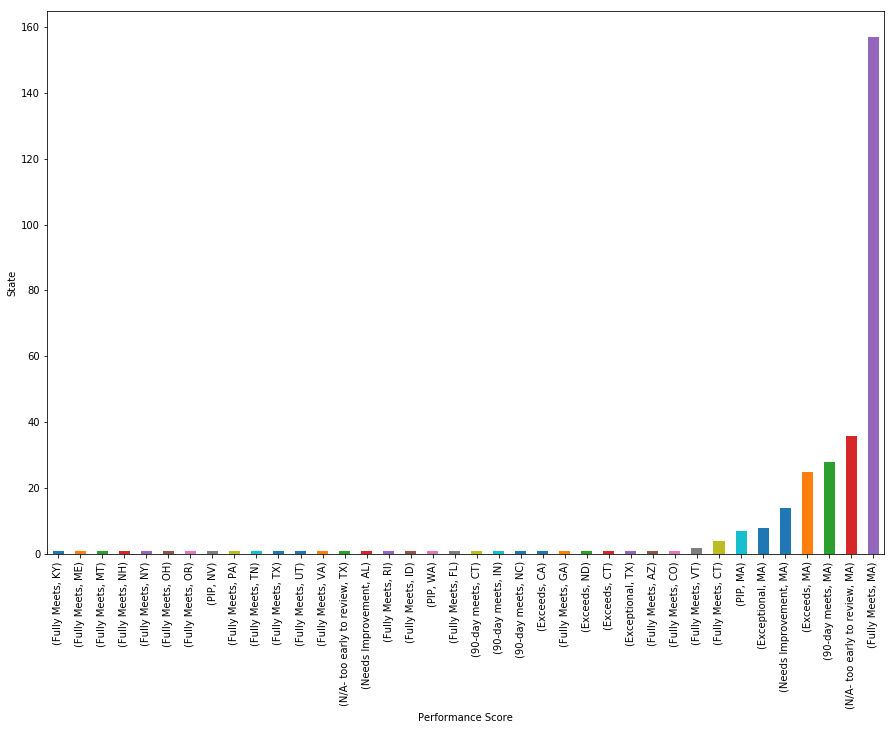

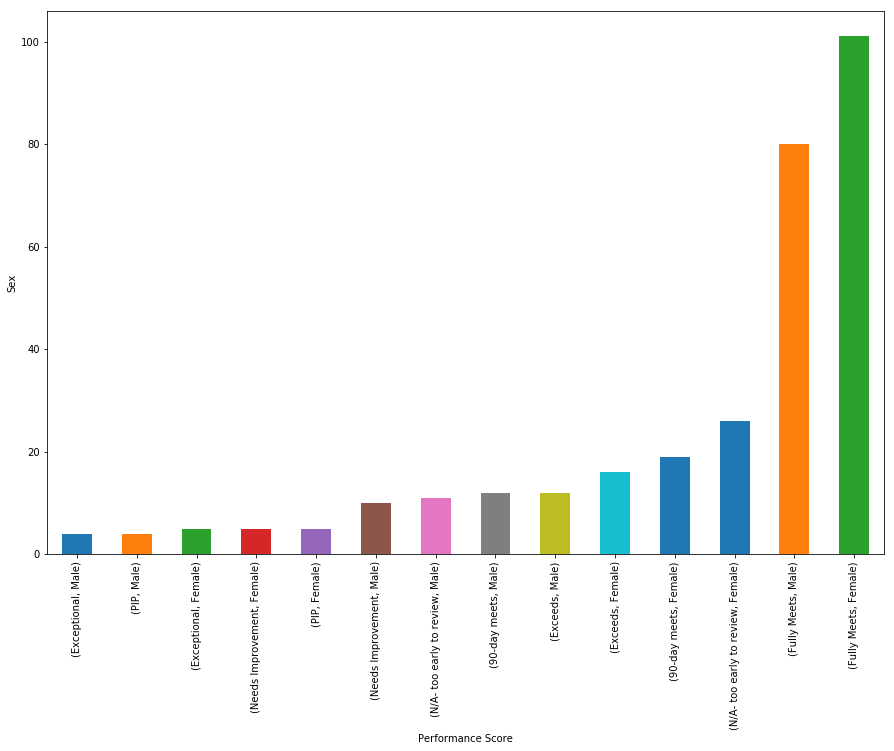

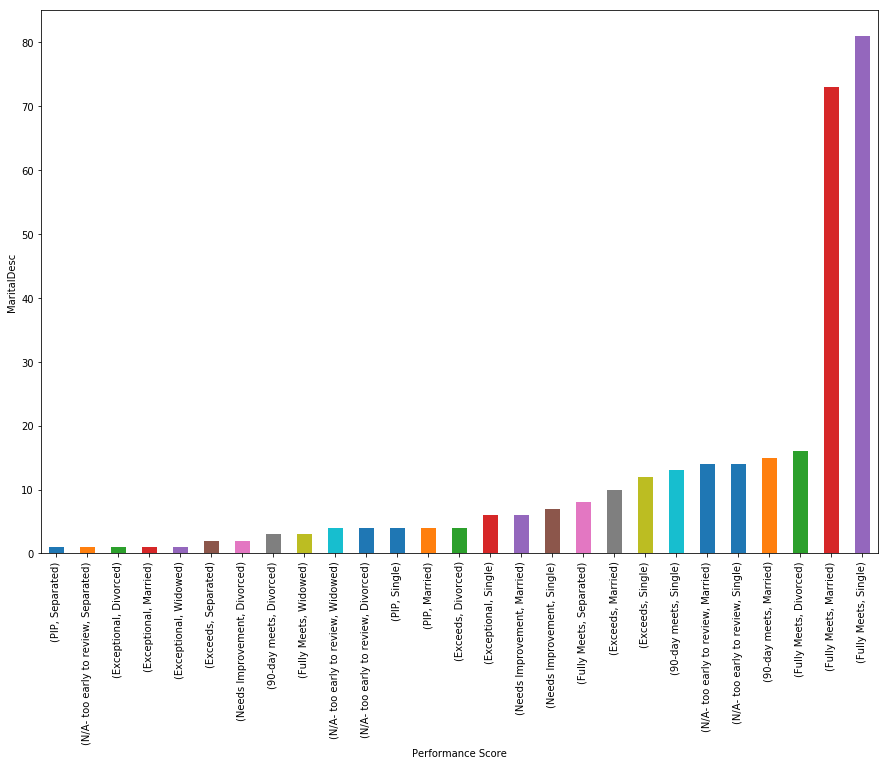

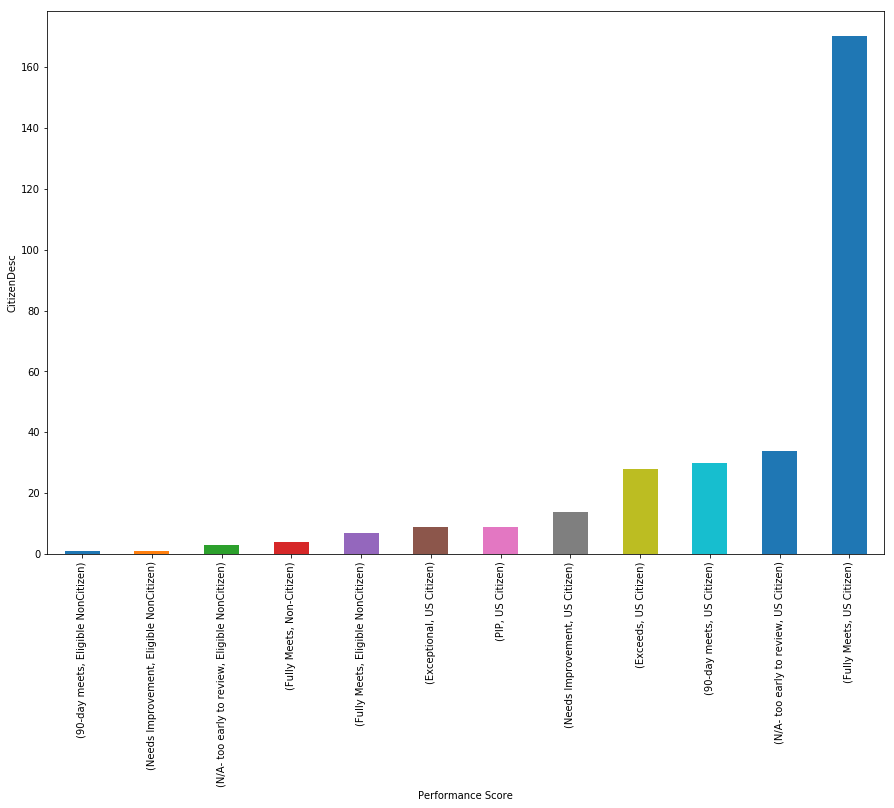

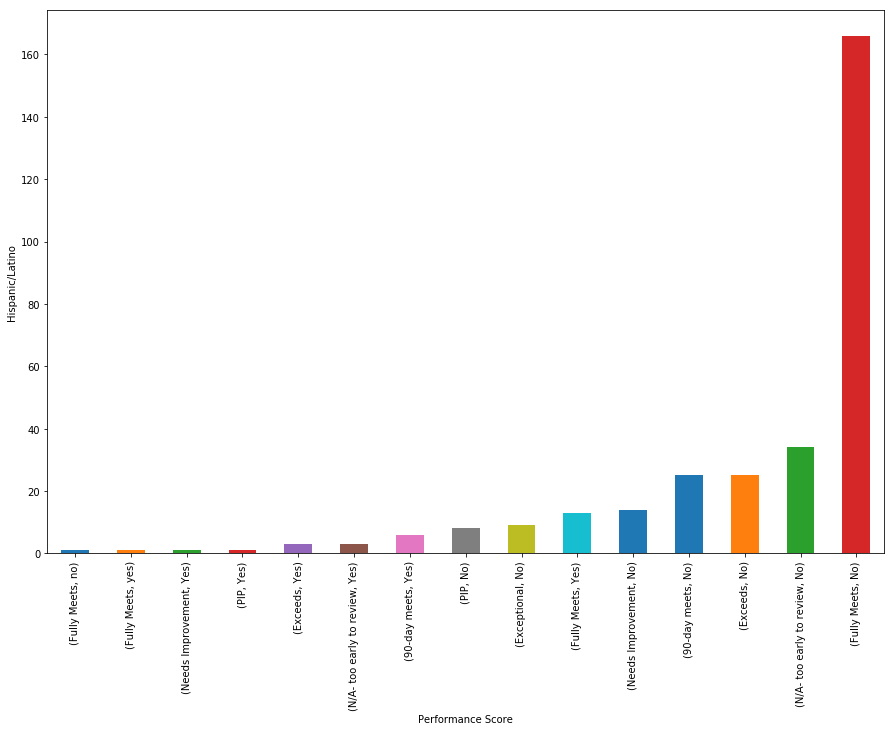

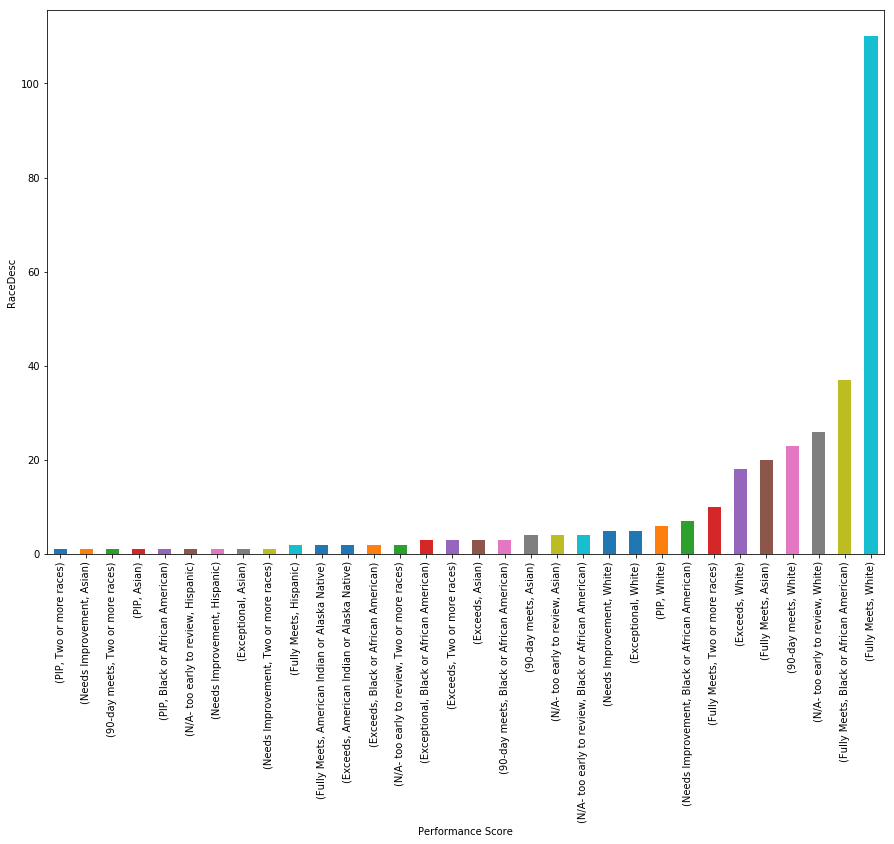

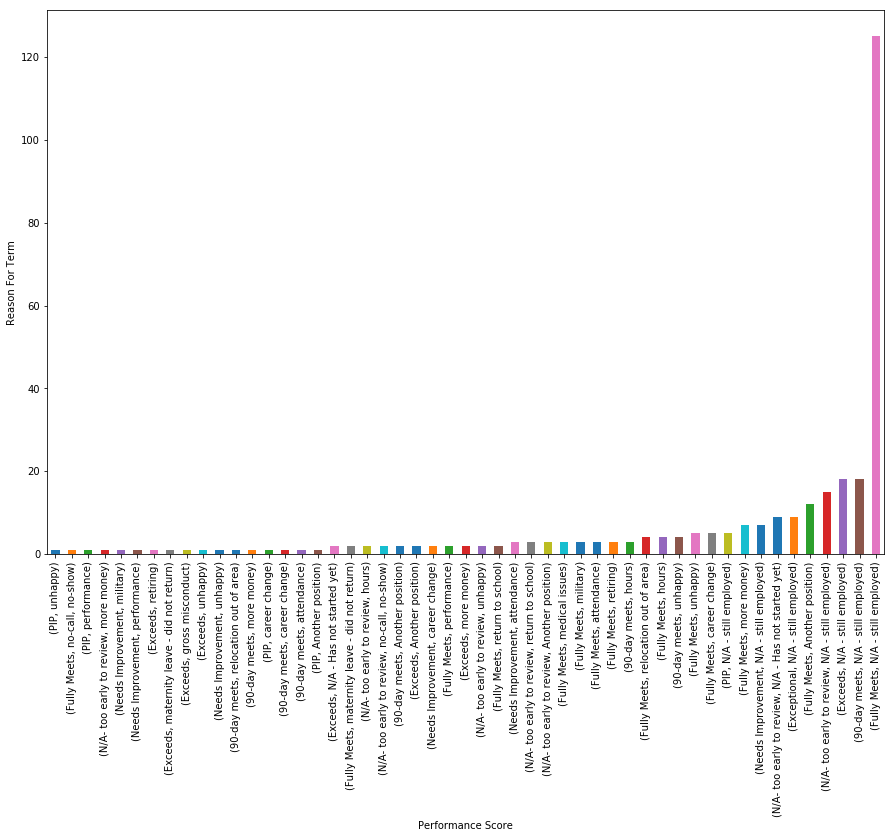

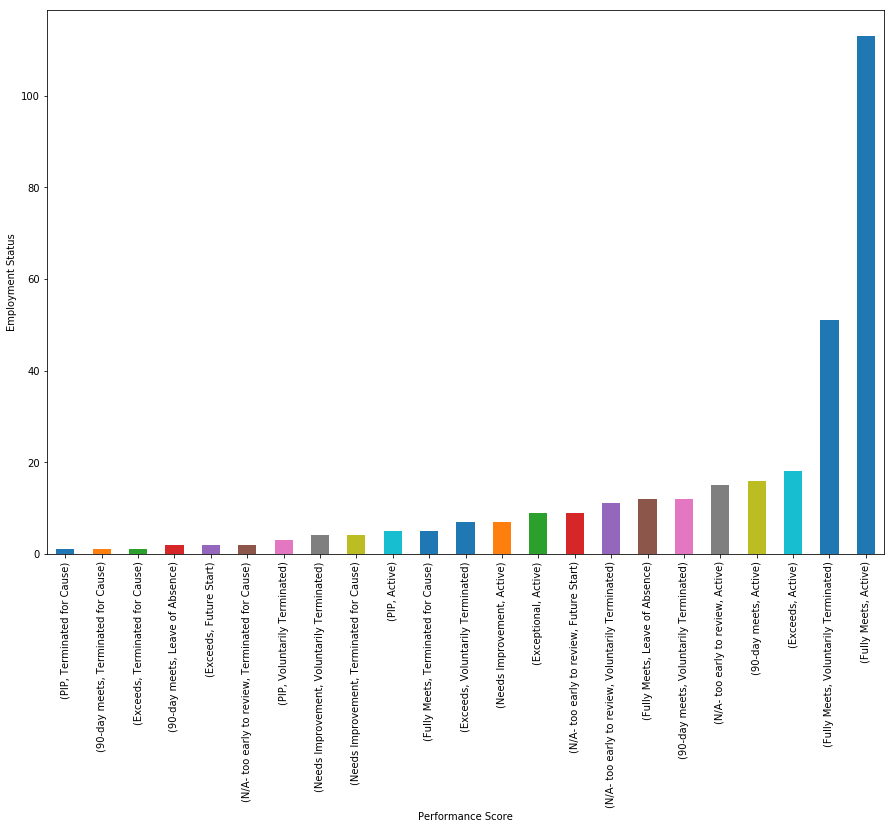

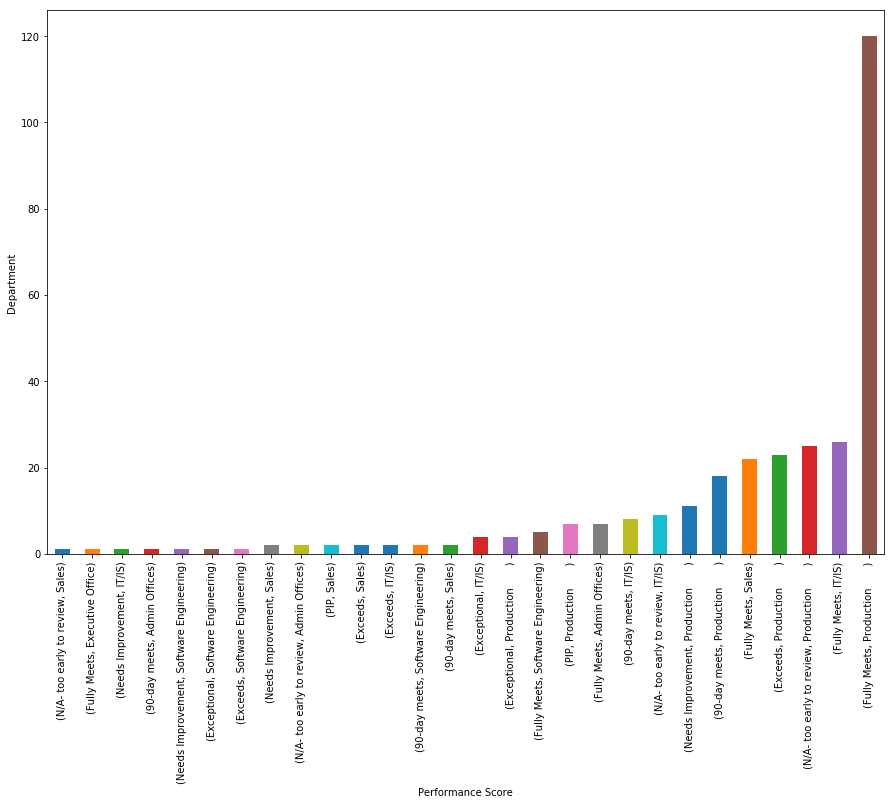

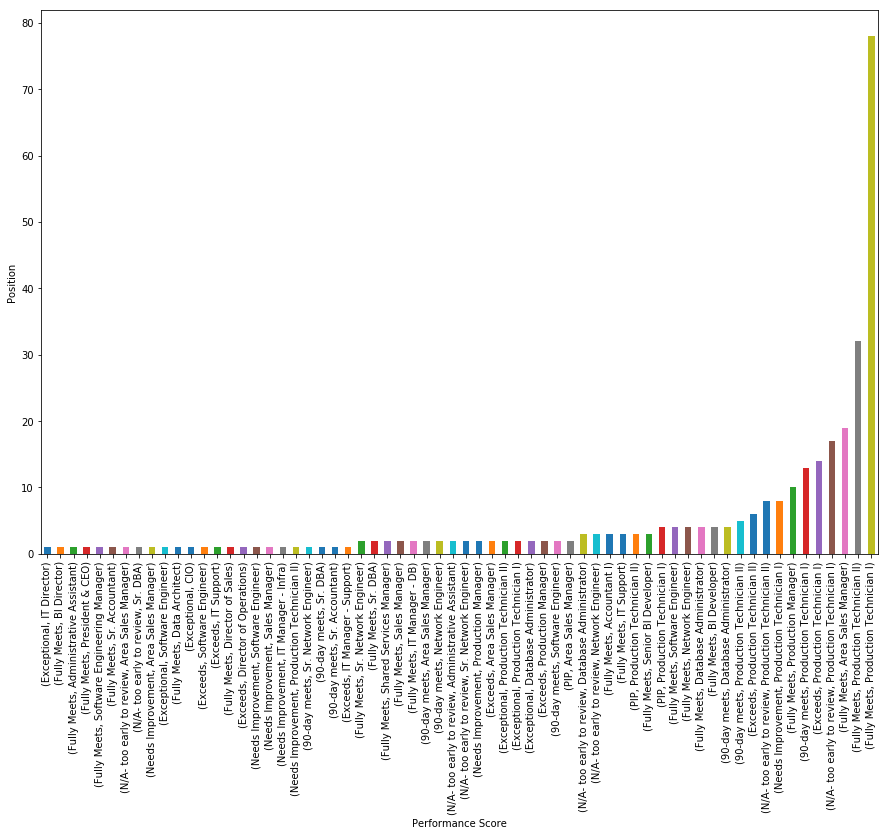

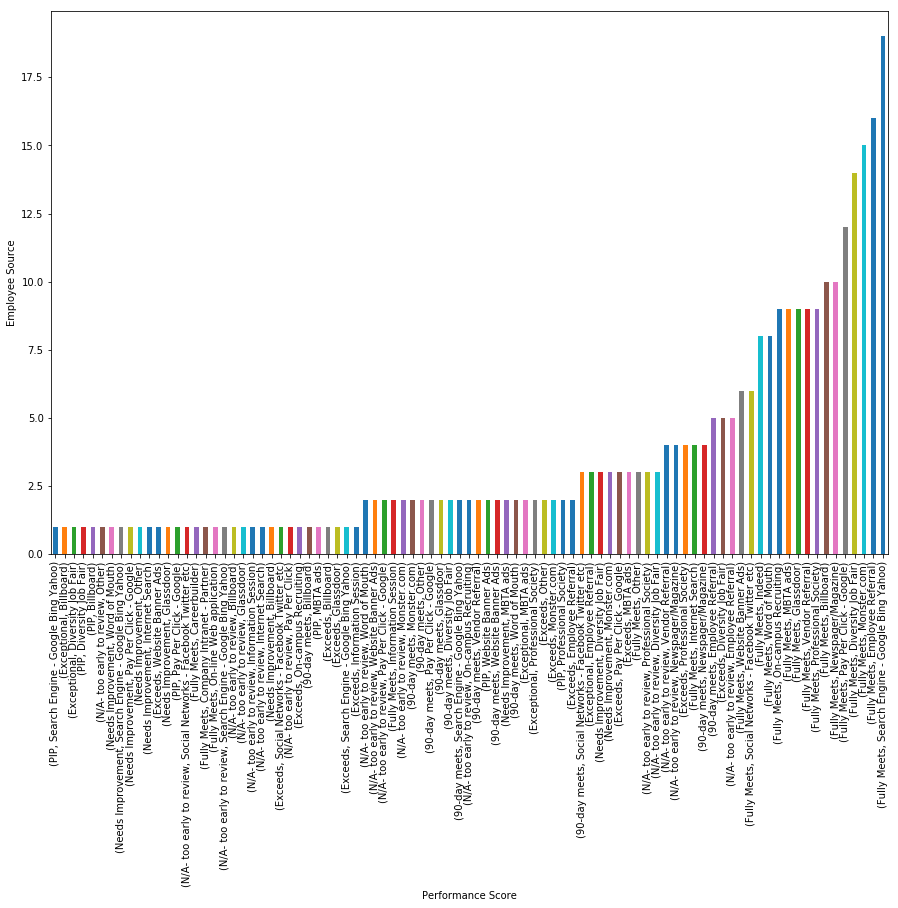

In [100]:
col_cat2 = col_cat[:-1] # get rid of the last var "Performance Score"

#Plotting 'Performance Score' with other attributes of the dataset
for col_name in col_cat2:
    HRdat_cat_perf = HRdat.groupby(['Performance Score'])[col_name].value_counts().sort_values()
    HRdat_cat_perf.plot(kind = 'bar',figsize = (15,10))
#    pd.crosstab(HRdat_cat_perf['Performance Score'],HRdat_cat_perf[col_name]).plot(kind='bar',figsize = (10,5))
    plt.xlabel('Performance Score')
    plt.ylabel(col_name)
    plt.show()

In [60]:
HRdat_cat_perf = HRdat.groupby(['Performance Score'])['State'].value_counts().sort_values()
HRdat_cat_perf

Performance Score         State
Fully Meets               KY         1
                          ME         1
                          MT         1
                          NH         1
                          NY         1
                          OH         1
                          OR         1
PIP                       NV         1
Fully Meets               PA         1
                          TN         1
                          TX         1
                          UT         1
                          VA         1
N/A- too early to review  TX         1
Needs Improvement         AL         1
Fully Meets               RI         1
                          ID         1
PIP                       WA         1
Fully Meets               FL         1
90-day meets              CT         1
                          IN         1
                          NC         1
Exceeds                   CA         1
Fully Meets               GA         1
Exceeds                   ND    

In [10]:
# missing data
HRdat[HRdat.isnull().any(axis=1)] #check if there's missing data along rows

,Age,Pay Rate,State,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Employee Source,Performance Score


In [11]:
HRdat[col_num] = HRdat[col_num].apply(pd.to_numeric, errors='coerce')

In [12]:
from sklearn.preprocessing import LabelEncoder 
# transform string categorical into int categorical
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
# http://www.ritchieng.com/machinelearning-one-hot-encoding/
labelenc = LabelEncoder()
HRdat[col_cat] = HRdat[col_cat].apply(labelenc.fit_transform) 
HRdat.head()

,Age,Pay Rate,State,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Employee Source,Performance Score
0,30,28.50,10,0,1,2,0,2,3317,2,0,0,0,3,3
1,34,23.00,10,1,0,2,0,2,1420,2,0,0,0,21,3
2,31,29.00,10,1,3,2,0,5,1154,2,0,0,0,8,3
3,32,21.50,10,0,1,2,0,5,58,2,0,0,1,16,4
4,30,16.56,10,0,3,2,0,5,940,2,0,0,1,21,4


In [13]:
HRdat.dtypes

Age                    int64
Pay Rate             float64
State                  int64
Sex                    int64
MaritalDesc            int64
CitizenDesc            int64
Hispanic/Latino        int64
RaceDesc               int64
Days Employed          int64
Reason For Term        int64
Employment Status      int64
Department             int64
Position               int64
Employee Source        int64
Performance Score      int64
dtype: object

In [14]:
HRdat.head()

,Age,Pay Rate,State,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Employee Source,Performance Score
0,30,28.50,10,0,1,2,0,2,3317,2,0,0,0,3,3
1,34,23.00,10,1,0,2,0,2,1420,2,0,0,0,21,3
2,31,29.00,10,1,3,2,0,5,1154,2,0,0,0,8,3
3,32,21.50,10,0,1,2,0,5,58,2,0,0,1,16,4
4,30,16.56,10,0,3,2,0,5,940,2,0,0,1,21,4


In [15]:
for col_name in col_cat:
    print({col_name: HRdat[col_name].unique()})

{'State': array([10, 23,  4, 25, 26,  2, 27, 15, 17, 18,  8,  7, 22, 16,  3, 24,  0,
        6,  5, 13,  9, 14, 12, 19,  1, 11, 21, 20], dtype=int64)}
{'Sex': array([0, 1], dtype=int64)}
{'MaritalDesc': array([1, 0, 3, 2, 4], dtype=int64)}
{'CitizenDesc': array([2, 0, 1], dtype=int64)}
{'Hispanic/Latino': array([0, 2, 1, 3], dtype=int64)}
{'RaceDesc': array([2, 5, 1, 4, 3, 0], dtype=int64)}
{'Reason For Term': array([ 2,  4, 12, 11,  6,  8,  1,  0, 14,  3, 16, 15, 13,  9, 10,  7,  5],
      dtype=int64)}
{'Employment Status': array([0, 4, 3, 2, 1], dtype=int64)}
{'Department': array([0, 1, 2, 3, 4, 5], dtype=int64)}
{'Position': array([ 0,  1, 22, 25, 16,  5,  7, 10, 11, 12, 13, 14, 15, 26, 27,  8, 17,
       18, 19,  2,  9, 20, 23, 24,  4, 21,  3,  6], dtype=int64)}
{'Employee Source': array([ 3, 21,  8, 16, 10, 14,  4, 18,  5, 20, 17,  7,  2, 12,  0,  9, 22,
       19, 13, 11, 15,  1,  6], dtype=int64)}
{'Performance Score': array([3, 4, 0, 2, 5, 1, 6], dtype=int64)}


In [16]:
#HRdat.to_csv('HRData.csv', sep='\t', encoding='utf-8')

### Model selection (using ready-to-grap functions)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing 

from sklearn.model_selection import train_test_split
x = HRdat.iloc[:,:-1] # drop last column; https://stackoverflow.com/questions/20517650/how-to-delete-the-last-column-of-data-of-a-pandas-dataframe 
y = HRdat['Performance Score']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

colname = ['Pay Rate','Age','Days Employed']
for col in colname:
    x_train[col] = preprocessing.scale(x_train[col],copy=True, with_mean=True, with_std=True)
    x_test[col] = preprocessing.scale(x_test[col],copy=True, with_mean=True, with_std=True)

In [18]:
x_train.dtypes

Age                  float64
Pay Rate             float64
State                  int64
Sex                    int64
MaritalDesc            int64
CitizenDesc            int64
Hispanic/Latino        int64
RaceDesc               int64
Days Employed        float64
Reason For Term        int64
Employment Status      int64
Department             int64
Position               int64
Employee Source        int64
dtype: object

In [19]:
y_train.dtypes

dtype('int64')

In [20]:
train_data = pd.concat([x_train, y_train], axis=1)

In [21]:
train_data.columns

Index(['Age', 'Pay Rate', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'Hispanic/Latino', 'RaceDesc', 'Days Employed', 'Reason For Term',
       'Employment Status', 'Department', 'Position', 'Employee Source',
       'Performance Score'],
      dtype='object')

In [22]:
train_data.head()

,Age,Pay Rate,State,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Employee Source,Performance Score
140,-0.352010,-1.078868,10,1,3,2,0,5,-1.463287,3,3,3,18,19,0
208,-0.133942,-0.427230,10,0,3,2,0,2,1.017026,2,0,3,19,4,3
278,-1.115246,1.527684,6,0,3,2,0,4,0.386656,2,0,4,2,16,3
203,-1.115246,-0.166575,10,0,1,2,0,5,-1.099216,6,4,3,19,11,0
144,0.629294,-1.078868,10,1,4,2,0,5,-1.671695,6,4,3,18,15,4


In [23]:
x_test.head()

,Age,Pay Rate,State,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Employee Source
289,-1.227718,1.937233,20,0,3,2,0,5,-0.514774,7,4,4,20,19
9,0.151054,0.291020,10,0,1,2,2,5,2.656573,2,0,0,25,14
57,-0.224975,1.530560,10,1,0,2,0,5,-0.502618,2,0,3,17,4
60,-0.224975,1.595628,10,0,1,2,0,5,0.321284,2,0,3,17,21
25,-0.099632,2.246305,10,1,3,2,0,2,1.535526,2,0,2,10,17


### Implementing knn
#Reference: https://github.com/sagarmk/Knn-from-scratch/blob/master/knn.py

### Data Cleaning

In [89]:
# SIMILARITY CHECK FUNCTION #
#Reference: https://github.com/sagarmk/Knn-from-scratch/blob/master/knn.py

# euclidean distance calculation
#Code tweaked to suit our data 

import numpy as np
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += ((instance1.iloc[x] - instance2.iloc[x])**2)
    return np.sqrt(distance)

In [63]:
# NEIGHBOURS - selecting subset with the smallest distance #
#Reference: https://github.com/sagarmk/Knn-from-scratch/blob/master/knn.py

import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        distances.append((trainingSet.iloc[x], dist))
    distances.sort(key=operator.itemgetter(1))
    #print(dist)
    #print(distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [64]:
# PREDICTED RESPONSE #
#Reference: https://github.com/sagarmk/Knn-from-scratch/blob/master/knn.py
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    #print(sortedVotes[0][0])
    return sortedVotes[0][0]

In [65]:
# MEASURING ACCURACY #
#Reference: https://github.com/sagarmk/Knn-from-scratch/blob/master/knn.py

#code tweaked to check if test and prediction values match
def getAccuracy(y_test, predictions):
    correct = 0
    y_test = y_test.tolist()
    for i in range(len(y_test)):
        if y_test[i] == predictions[i]:
            correct = correct + 1
    return (correct/float(len(y_test))*100) 

In [66]:
#Reference: https://github.com/sagarmk/Knn-from-scratch/blob/master/knn.py
# main function for calling KNN model for prediction

trainingSet = pd.concat([x_train, y_train], axis=1)
testSet = x_test
print ('Train set: ' + repr(len(trainingSet)))
print ('Test set: ' + repr(len(testSet)))
# generate predictions
predictions=[]
k = 5
testSet.head()
print(range(len(testSet)))

for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet.iloc[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(y_test.iloc[x]))

Train set: 232
Test set: 78
range(0, 78)
> predicted=3.0, actual=3
> predicted=3.0, actual=3
> predicted=3.0, actual=3
> predicted=3.0, actual=1
> predicted=1.0, actual=2
> predicted=3.0, actual=3
> predicted=3.0, actual=5
> predicted=3.0, actual=1
> predicted=3.0, actual=0
> predicted=4.0, actual=0
> predicted=3.0, actual=3
> predicted=3.0, actual=3
> predicted=3.0, actual=1
> predicted=3.0, actual=3
> predicted=3.0, actual=3
> predicted=3.0, actual=5
> predicted=3.0, actual=3
> predicted=3.0, actual=1
> predicted=3.0, actual=3
> predicted=4.0, actual=3
> predicted=3.0, actual=4
> predicted=3.0, actual=5
> predicted=3.0, actual=3
> predicted=3.0, actual=0
> predicted=3.0, actual=3
> predicted=3.0, actual=5
> predicted=3.0, actual=4
> predicted=3.0, actual=3
> predicted=3.0, actual=3
> predicted=3.0, actual=3
> predicted=3.0, actual=3
> predicted=3.0, actual=4
> predicted=3.0, actual=3
> predicted=3.0, actual=3
> predicted=3.0, actual=0
> predicted=3.0, actual=3
> predicted=3.0, actual

In [67]:
#Generating accuracy of KNN model
accuracy = getAccuracy(y_test, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 53.84615384615385%


Accuracy of 53% might seem low but as the number of classes is large, it is not too bad.

In [68]:
#Ref: https://www.dataquest.io/blog/k-nearest-neighbors-in-python/
mse = (((predictions - y_test)**2).sum())/ len(predictions)
print('Mean Squared Error: ' + repr(mse) + '%')
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ' + repr(rmse) + '%')

Mean Squared Error: 2.2948717948717947%
Root Mean Squared Error: 1.5148834261657875%


##### Logistic Regression

In [69]:
# https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logisticRegr_predictions = logisticRegr.predict(x_test)
logisticRegr_predictions

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3], dtype=int64)

In [70]:
logisticRegr_score = logisticRegr.score(x_test, y_test)
print('accuracy of logistic regression classifier on the test set:{:.2f}'.format(logisticRegr_score))

accuracy of logistic regression classifier on the test set:0.54


In [71]:
print("Mean squared error on test set: %.2f" % mean_squared_error(y_test, logisticRegr.predict(x_test)))
print("RMSE on test set: %.2f" % np.sqrt(mean_squared_error(y_test, logisticRegr.predict(x_test))))
print("variance explained on test set: %.2f" % r2_score(y_test, logisticRegr.predict(x_test)))


Mean squared error on test set: 2.03
RMSE on test set: 1.42
variance explained on test set: -0.09


##### decision tree

In [72]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [73]:
print("Mean squared error on train set: %.2f" % mean_squared_error(y_train, tree.predict(x_train)))
print("RMSE on train set: %.2f" % np.sqrt(mean_squared_error(y_train, tree.predict(x_train))))
print("variance explained on train set: %.2f" % r2_score(y_train, tree.predict(x_train)))


Mean squared error on train set: 0.00
RMSE on train set: 0.00
variance explained on train set: 1.00


In [74]:
print("Mean squared error on test set: %.2f" % mean_squared_error(y_test, tree.predict(x_test)))
print("RMSE on test set: %.2f" % np.sqrt(mean_squared_error(y_test, tree.predict(x_test))))
print("variance explained on test set: %.2f" % -r2_score(y_test, tree.predict(x_test)))


Mean squared error on test set: 3.12
RMSE on test set: 1.77
variance explained on test set: 0.68


In [75]:
tree_score = tree.score(x_test, y_test)
print('accuracy of decision tree classifier on the test set:{:.2f}'.format(tree_score))

accuracy of decision tree classifier on the test set:0.42


In [76]:
tree_scores = cross_val_score(tree,  x_train, y_train,  scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
print({'mean': tree_rmse_scores.mean(),
      'std':tree_rmse_scores.std(),
      'score':tree_rmse_scores})

{'mean': 1.7447023789701075, 'std': 0.2790307171179601, 'score': array([1.54919334, 1.60727513, 2.1408721 , 1.41421356, 1.44337567,
       1.63299316, 1.50361882, 2.03380521, 1.9886039 , 2.1330729 ])}


In [77]:
sorted(zip(x_test, tree.feature_importances_), reverse=False)

[('Age', 0.15994840186436893),
 ('CitizenDesc', 0.0),
 ('Days Employed', 0.34261074388636903),
 ('Department', 0.017514192535330358),
 ('Employee Source', 0.038531223577726786),
 ('Employment Status', 0.056158464600588646),
 ('Hispanic/Latino', 0.008794651066473948),
 ('MaritalDesc', 0.06798680181707954),
 ('Pay Rate', 0.1536272657549643),
 ('Position', 0.0377771241250428),
 ('RaceDesc', 0.06803667093631975),
 ('Reason For Term', 0.03616812067556843),
 ('Sex', 0.003277509714213868),
 ('State', 0.009568829445953757)]

Feature Importance based on Decision Tree:
Age 
Pay rate
Days employed

##### random forest

In [78]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
print("Mean squared error on train set: %.2f" % mean_squared_error(y_train, forest.predict(x_train)))
print("RMSE on train set: %.2f" % np.sqrt(mean_squared_error(y_train, forest.predict(x_train))))
print("variance explained on train set: %.2f" % r2_score(y_train, forest.predict(x_train)))

Mean squared error on train set: 0.10
RMSE on train set: 0.31
variance explained on train set: 0.94


In [80]:
forest_predictions = forest.predict(x_test)
print("Mean squared error on test set: %.2f" % mean_squared_error(y_test, forest_predictions))
print("RMSE on test set: %.2f" % np.sqrt(mean_squared_error(y_test, forest_predictions)))
print("variance explained on test set: %.2f" % -r2_score(y_test, forest_predictions))

Mean squared error on test set: 2.33
RMSE on test set: 1.53
variance explained on test set: 0.26


In [81]:
forest_score = forest.score(x_test, y_test)
print('accuracy of random forest classifier on the test set:{:.2f}'.format(forest_score))

accuracy of random forest classifier on the test set:0.58


In [82]:
forest_scores = cross_val_score(forest,  x_train, y_train,  scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print({'mean': forest_rmse_scores.mean(),
      'std':forest_rmse_scores.std(),
      'score':forest_rmse_scores})

{'mean': 1.4832657180726962, 'std': 0.11471688515858082, 'score': array([1.57480157, 1.70782513, 1.38443731, 1.48604621, 1.51382518,
       1.29099445, 1.53226176, 1.43019388, 1.55212464, 1.36014705])}


In [83]:
sorted(zip(x_test, forest.feature_importances_), reverse=False)

[('Age', 0.13442252182199638),
 ('CitizenDesc', 0.012753842605125104),
 ('Days Employed', 0.22130648188568056),
 ('Department', 0.027729431221492823),
 ('Employee Source', 0.10414319263303803),
 ('Employment Status', 0.05190171660975257),
 ('Hispanic/Latino', 0.01618990676656416),
 ('MaritalDesc', 0.05751608423572101),
 ('Pay Rate', 0.11865831502063798),
 ('Position', 0.0654267180205935),
 ('RaceDesc', 0.045935795237153146),
 ('Reason For Term', 0.08142041985124603),
 ('Sex', 0.031127641620670443),
 ('State', 0.03146793247032832)]

Feature Importance based on Random Forest:
Days employed
Age 
Pay rate
Employee source

Insights:
Performance Score seems to be related to Days Employed, Age, Pay Rate and Employee Source

Most  of the source of employment is through employee referrals followed by job fair

Most ‘Fully meets’ rating from Search Engine, followed by Employee Referral, Monster.com,  and Diversity Job fair, in that order

Most ‘Exceeds expectations’ rating from Diversity Job fair followed by Professional Society and MBTA ads

The company has more female staff than male

Performance score of females generally better than performance score of males

Production department has most employees which meets company expectations and also the highest number of employees whose performance needs improvement (PIP)


    

Reccomendation:

To ensure quality hires, focus on the right employee sources

Also, experience within the company positively affects performance score, so it is especially important to retain the experienced employees

Pay rate is certainly a motivator for better performance so, higher performing employees should be compensated better based on their performance scores

A diverse workforce with respect to gender seems to work well for the company and it should maintain the diversity

As Production department has highest number of employees with ‘performance needs improvement’ or ‘PIP’, investigation should be conducted to identify ‘skill or will’ issue and appropriate training or counseling could be provided

Employee Referral program should be promoted. Also, Diversity Job fair, Professional Society and MBTA ads should be tapped more for quality hires
